In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# data understanding

About this file Training set for Credit Card Transactions 1.index - Unique Identifier for each row 2.transdatetrans_time - Transaction DateTime 3.cc_num - Credit Card Number of Customer 4.merchant - Merchant Name 5.category - Category of Merchant 6.amt - Amount of Transaction 7.first - First Name of Credit Card Holder 8.last - Last Name of Credit Card Holder 9.gender - Gender of Credit Card Holder 10.street - Street Address of Credit Card Holder 11.city - City of Credit Card Holder 12.state - State of Credit Card Holder 13.zip - Zip of Credit Card Holder 14.lat - Latitude Location of Credit Card Holder 15.long - Longitude Location of Credit Card Holder 16.city_pop - Credit Card Holder's City Population 17.job - Job of Credit Card Holder 18.dob - Date of Birth of Credit Card Holder 19.trans_num - Transaction Number 20.unix_time - UNIX Time of transaction 21.merch_lat - Latitude Location of Merchant 22.merch_long - Longitude Location of Merchant 23.is_fraud - Fraud Flag <--- Target Class

# Reading the Dataset

In [69]:
df=pd.read_csv(r"C:\Users\SOBITACHI\Downloads\CAPSTONE PROJECT DATASET\Finance Dataset\fraudTrain.csv", index_col=0)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Data Dictionary

checking shape of the dataset

In [70]:
df.shape

(1296675, 22)

checking the datatypes

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [72]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

checking for missing values

In [74]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Descriptive Summary

In [75]:
# For Numerrical columns
df.describe(include='number')

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [76]:
# For Categorical Columns
df.describe(include='object')

,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,693,14,352,481,2,983,894,51,494,968,1296675
top,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4403,131659,26669,28794,709863,3123,5617,94876,9779,5636,1


# Checking For Outliers

In [77]:
df_out=df.drop(columns=['trans_date_trans_time','is_fraud','cc_num'])

In [78]:
df_out.columns

Index(['merchant', 'category', 'amt', 'first', 'last', 'gender', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long'],
      dtype='object')

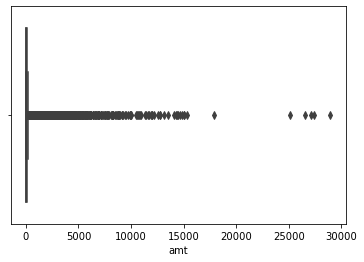

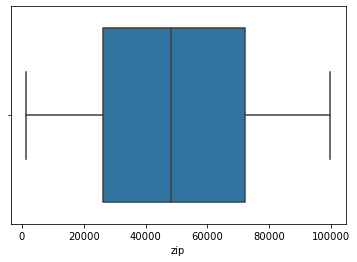

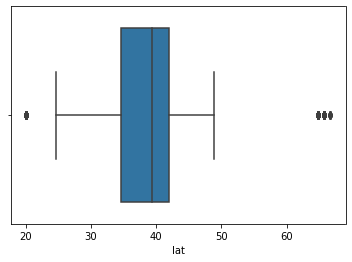

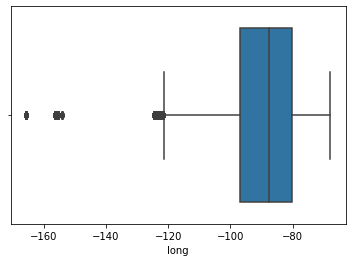

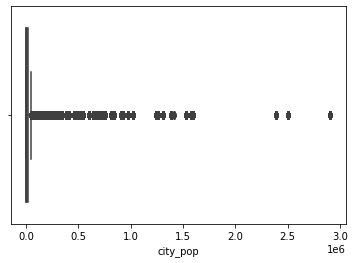

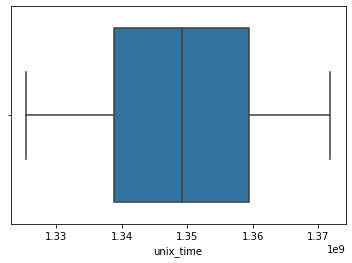

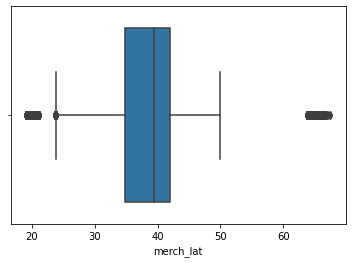

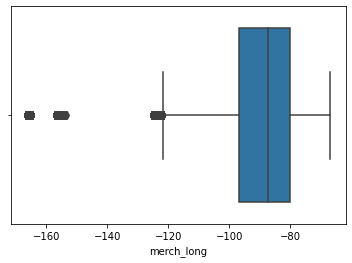

In [79]:
c=1
for i in df_out.select_dtypes(include='number').columns:
    sns.boxplot(df_out[i])
    c+=1
    plt.show()

# Checking Multicollinearity

In [81]:
df_n=df.select_dtypes(include='number').drop(columns=['cc_num','is_fraud'])

In [82]:
df_n

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
0,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315
1,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462
2,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481
3,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071
4,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...,...
1296670,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765
1296671,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528
1296672,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529
1296673,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df_n
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
print(vif)

   VIF_Factor    Features
0    1.000025         amt
1    6.381240         zip
2   78.405727         lat
3  573.496917        long
4    1.028612    city_pop
5  164.933928   unix_time
6   78.282734   merch_lat
7  568.163012  merch_long


In [84]:
vif.sort_values(by=["VIF_Factor"],ascending=False)

,VIF_Factor,Features
3,573.496917,long
7,568.163012,merch_long
5,164.933928,unix_time
2,78.405727,lat
6,78.282734,merch_lat
1,6.381240,zip
4,1.028612,city_pop
0,1.000025,amt


# Distribution of numerical variables

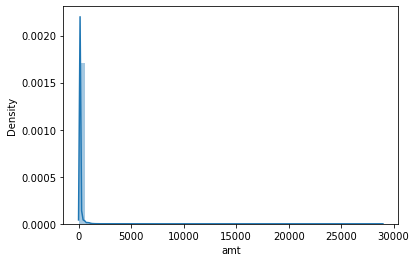

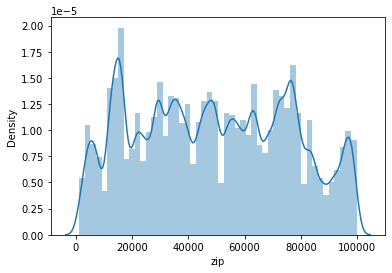

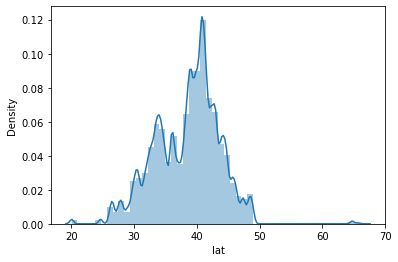

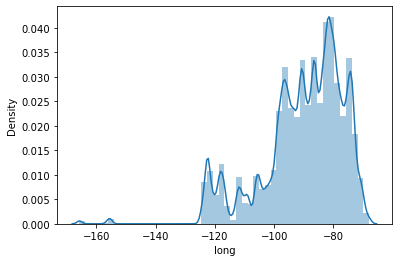

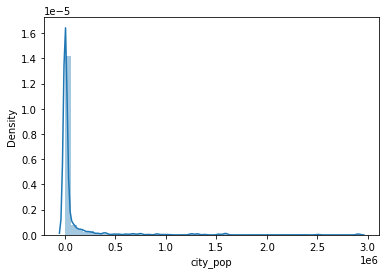

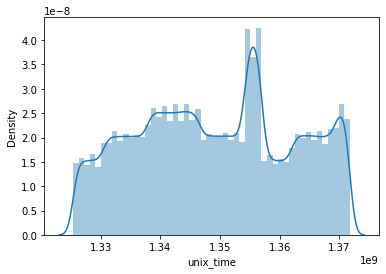

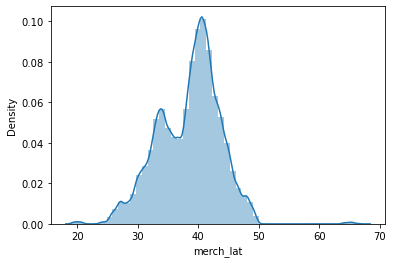

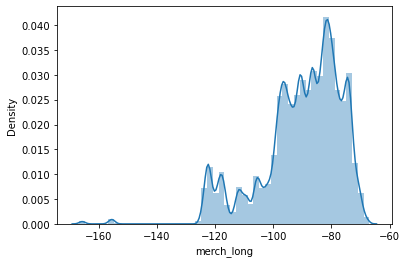

In [85]:
c=1
for i in df_n.columns:
    sns.distplot(df_n[i])
    c+=1
    plt.show()

In [86]:
df.skew()

cc_num         2.851879
amt           42.277874
zip            0.079681
lat           -0.186028
long          -1.150108
city_pop       5.593853
unix_time      0.003378
merch_lat     -0.181915
merch_long    -1.146960
is_fraud      13.029122
dtype: float64